## Projects:

- Diffusion Models;
- YOLO versions  - object detection;
- Segment Anything Model (https://segment-anything.com/) (Liked);
- Mathematical Integration;
- BERT fine-tuning - Text classification (compare with logistic regression and TF-IDF vectors);
- CNN visualization - review the different techniques used to analyze CNN predictions;
- Monte Carlo dropout - review briefly the concept of uncertainty and what are the main techniques used to deal with uncertainty in deep learning;
- Deep vs Wide Neural Networks - Try to understand the effect of adding layers or adding parameters in a layer;
- Overparameterization regime;
- Neural ODEs - Neural Networks and ordinary differential equations are the two main modelization techniques used nowadays, review papers explaining some evolution of the idea of Neural ODE.

General observations:

- Presentation of 15 min 
- 70% grade
- No need to submit the code

Evaluation aspects:

- Clarity
- Understanding of concepts
- Depth of research and/or experiments

✅ SAM Model loaded successfully!


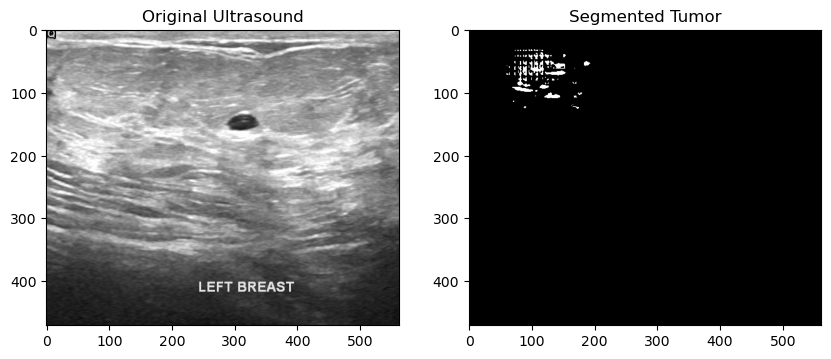

In [3]:
import torch
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from segment_anything import SamPredictor, sam_model_registry

# Load SAM model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sam = sam_model_registry["vit_h"](checkpoint="sam_vit_h_4b8939.pth").to(device)
predictor = SamPredictor(sam)
print("✅ SAM Model loaded successfully!")

# Path to dataset
dataset_path = ""

# Load an example ultrasound image (Benign case)
image_path = "C:/Users/elisa/OneDrive/Desktop/Deep Learning/DL_Project/Breast_Images/benign/benign (1).png"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define bounding box for the tumor (manual annotation or auto-detect)
bbox = np.array([50, 50, 200, 200])  # Example bounding box

# Run SAM on the image
predictor.set_image(image_rgb)
masks, _, _ = predictor.predict(box=bbox)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Ultrasound")
plt.subplot(1, 2, 2)
plt.imshow(masks[0], cmap="gray")
plt.title("Segmented Tumor")
plt.show()
